In [1]:
import pandas as pd
import numpy as np
from scipy import stats

df=pd.read_excel('data.xlsx')
df2=pd.read_excel('data2.xlsx')

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, auc, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
from math import sqrt
from scipy.fft import fft, fftfreq
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# 一些基本设置
# 设置支持中文字体（黑体）
plt.rcParams['font.sans-serif']=['SimHei'] # 中文支持
plt.rcParams['axes.unicode_minus']=False
# 设置图片清晰度（200dpi: 200像素每英寸）
matplotlib.rcParams['figure.dpi'] = 200
# 图画面板调整为白色
matplotlib.rcParams['axes.facecolor']='white'
matplotlib.rcParams['savefig.facecolor']='white'

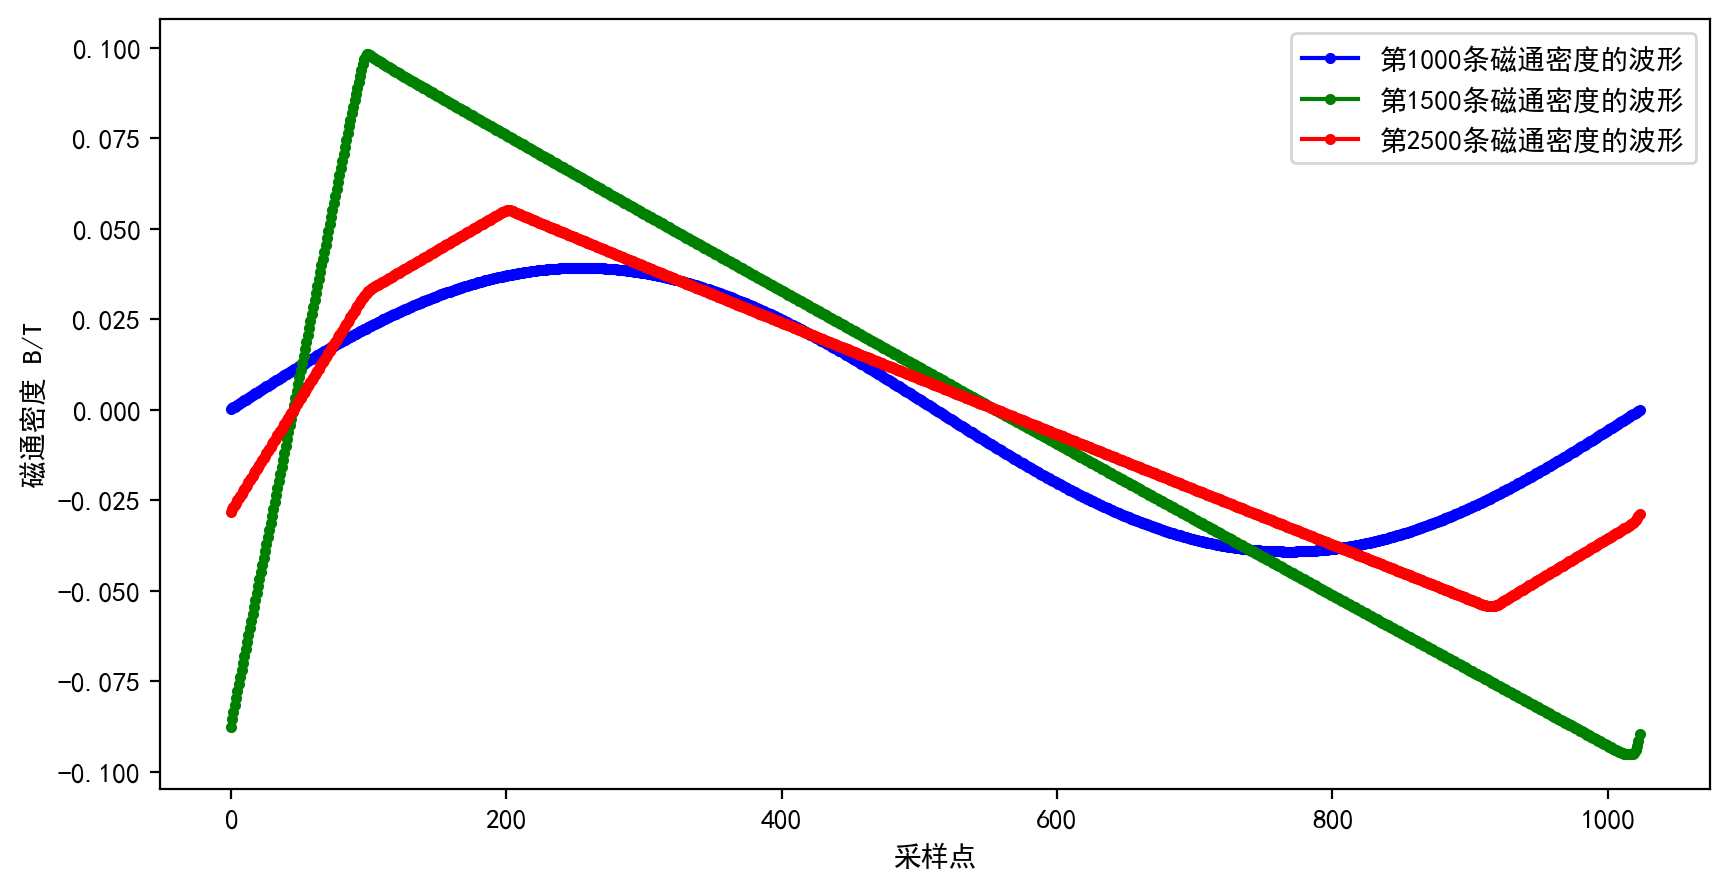

In [6]:
df_backup.rename(columns={'0（磁通密度B，T）': '0'}, inplace=True)
# 将所有列名转换为字符串类型
df_backup.columns = df_backup.columns.astype(str)

data_1000 = pd.to_numeric(df_backup.iloc[999, 1:], errors='coerce').dropna()
data_1500 = pd.to_numeric(df_backup.iloc[1499, 1:], errors='coerce').dropna()
data_2500 = pd.to_numeric(df_backup.iloc[2499, 1:], errors='coerce').dropna()
plt.figure(figsize=(10, 5))
# 绘制第1000条磁通密度的波形
plt.plot(data_1000, marker='o', linestyle='-', color='b', label='第1000条磁通密度的波形', markersize=3)
# 绘制第1500条磁通密度的波形
plt.plot(data_1500, marker='o', linestyle='-', color='g', label='第1500条磁通密度的波形', markersize=3)
# 绘制第2500条磁通密度的波形
plt.plot(data_2500, marker='o', linestyle='-', color='r', label='第2500条磁通密度的波形', markersize=3)
plt.xticks(ticks=[0, 200, 400, 600, 800, 1000])
plt.xlabel('采样点')
plt.ylabel('磁通密度 B/T')
plt.legend()
plt.savefig('初始磁通密度数据的三种波形图.png')
plt.show()

In [5]:
df_backup = df.copy() 
# 创建 MinMaxScaler 对象并指定范围 [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))

# 对每一行进行归一化
df = pd.DataFrame(scaler.fit_transform(df.iloc[:, 1:].T).T, columns=df.iloc[:, 1:].columns)

# 输出归一化后的 DataFrame
df

,0（磁通密度B，T）,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.007229,0.013357,0.019479,0.025605,0.031722,0.037846,0.043961,0.050064,0.056166,0.062257,...,-0.053902,-0.047779,-0.041663,-0.035566,-0.029460,-0.023328,-0.017198,-0.011102,-0.005001,0.001112
1,-0.017402,-0.011261,-0.005130,0.001017,0.007149,0.013265,0.019392,0.025522,0.031651,0.037775,...,-0.078663,-0.072549,-0.066429,-0.060312,-0.054198,-0.048078,-0.041947,-0.035807,-0.029674,-0.023547
2,-0.106706,-0.100633,-0.094586,-0.088542,-0.082480,-0.076417,-0.070360,-0.064296,-0.058218,-0.052129,...,-0.167162,-0.161143,-0.155119,-0.149080,-0.143034,-0.136984,-0.130927,-0.124871,-0.118829,-0.112784
3,-0.012645,-0.006541,-0.000440,0.005670,0.011774,0.017879,0.023979,0.030072,0.036173,0.042273,...,-0.073599,-0.067507,-0.061423,-0.055338,-0.049244,-0.043148,-0.037056,-0.030965,-0.024867,-0.018758
4,0.010796,0.016894,0.022978,0.029067,0.035160,0.041249,0.047333,0.053420,0.059515,0.065607,...,-0.050192,-0.044100,-0.038000,-0.031901,-0.025808,-0.019713,-0.013611,-0.007511,-0.001413,0.004689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,-0.524328,-0.512189,-0.500396,-0.488865,-0.477447,-0.466008,-0.454513,-0.443043,-0.431638,-0.420263,...,-0.594184,-0.589648,-0.585035,-0.580353,-0.575597,-0.570607,-0.564851,-0.557483,-0.547935,-0.536538
12396,-0.528702,-0.516491,-0.504602,-0.492960,-0.481415,-0.469840,-0.458241,-0.446690,-0.435186,-0.423692,...,-0.600261,-0.595754,-0.591175,-0.586527,-0.581785,-0.576720,-0.570699,-0.562854,-0.552782,-0.541043
12397,-0.526174,-0.514039,-0.502212,-0.490641,-0.479157,-0.467639,-0.456103,-0.444598,-0.433130,-0.421694,...,-0.596645,-0.592093,-0.587478,-0.582805,-0.578049,-0.573023,-0.567146,-0.559557,-0.549805,-0.538349
12398,-0.523896,-0.511780,-0.499978,-0.488450,-0.477022,-0.465573,-0.454099,-0.442639,-0.431215,-0.419825,...,-0.594317,-0.589725,-0.585056,-0.580313,-0.575482,-0.570393,-0.564500,-0.556982,-0.547360,-0.536017


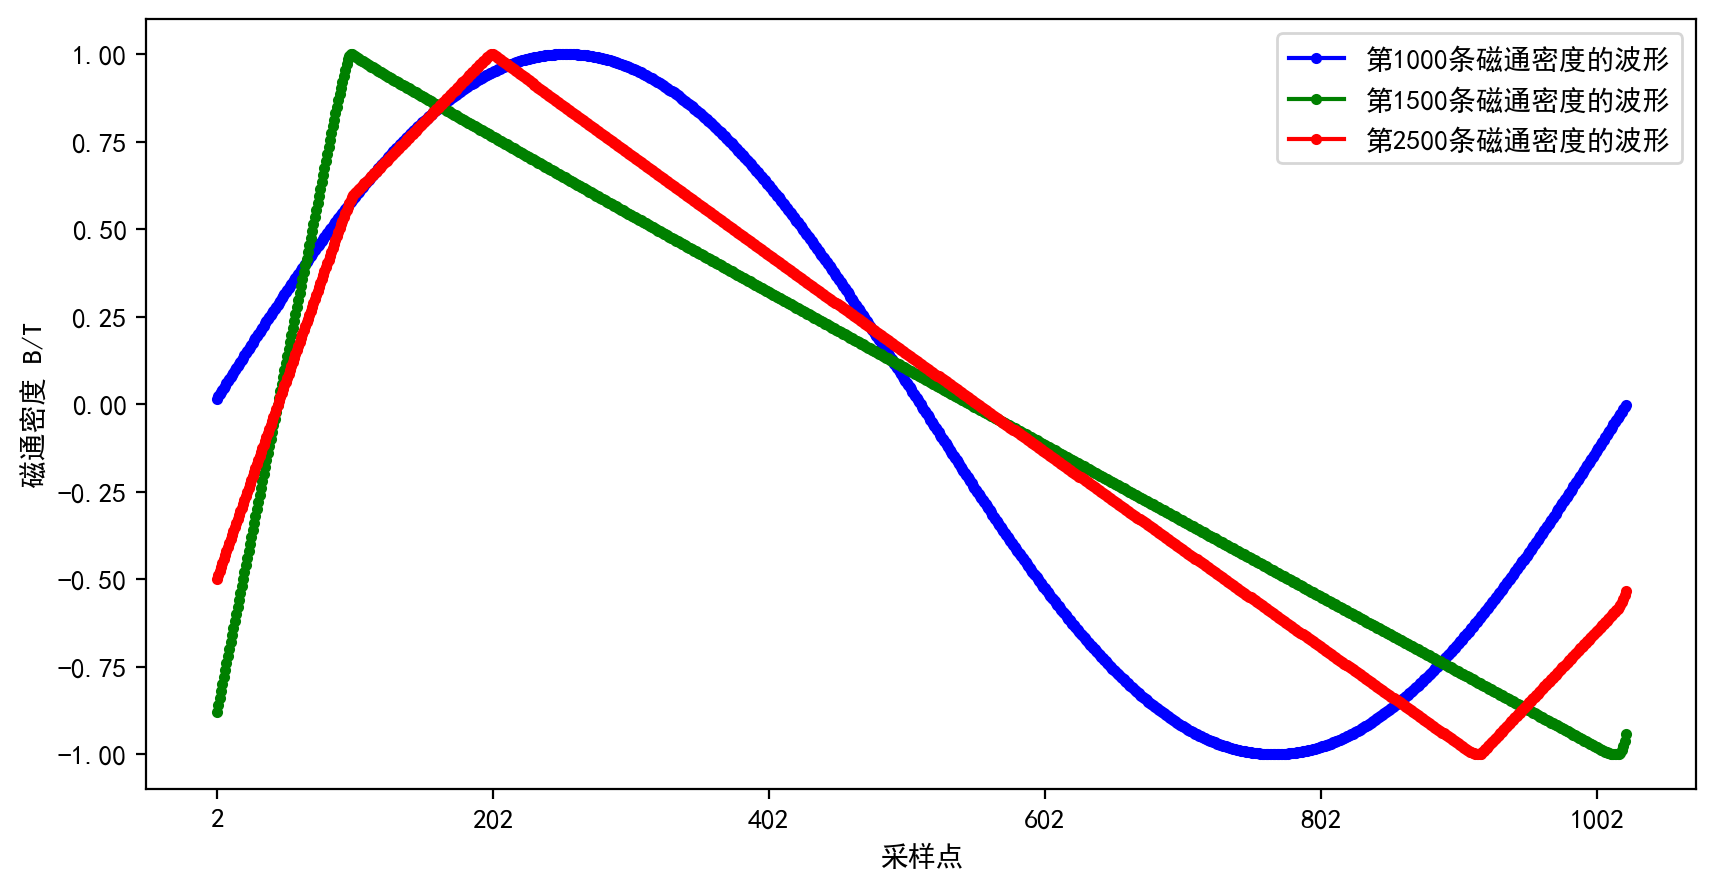

In [6]:
test=df.iloc[:,1:1025]
test.rename(columns={'0（磁通密度B，T）': '0'}, inplace=True)
test.columns = test.columns.astype(str)

data_1000 = pd.to_numeric(test.iloc[999, 1:], errors='coerce').dropna()
data_1500 = pd.to_numeric(test.iloc[1499, 1:], errors='coerce').dropna()
data_2500 = pd.to_numeric(test.iloc[2499, 1:], errors='coerce').dropna()
plt.figure(figsize=(10, 5))
# 绘制第1000条磁通密度的波形
plt.plot(data_1000, marker='o', linestyle='-', color='b', label='第1000条磁通密度的波形', markersize=3)
# 绘制第1500条磁通密度的波形
plt.plot(data_1500, marker='o', linestyle='-', color='g', label='第1500条磁通密度的波形', markersize=3)
# 绘制第2500条磁通密度的波形
plt.plot(data_2500, marker='o', linestyle='-', color='r', label='第2500条磁通密度的波形', markersize=3)
plt.xticks(ticks=[0, 200, 400, 600, 800, 1000])
plt.xlabel('采样点')
plt.ylabel('磁通密度 B/T')
plt.legend()
plt.savefig('归一化后磁通密度数据的三种波形图.png')
plt.show()

In [7]:
# 对每一行进行归一化
df2 = pd.DataFrame(scaler.fit_transform(df2.T).T, columns=df2.columns)

# 输出归一化后的 DataFrame
df2

,0（磁通密度B，T）,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.942928,-0.922989,-0.903090,-0.883206,-0.863326,-0.843490,-0.823693,-0.803901,-0.784101,-0.764305,...,-0.991815,-0.993930,-0.996019,-0.997909,-0.999367,-1.000000,-0.997630,-0.990240,-0.978107,-0.961925
1,-0.931252,-0.911233,-0.891339,-0.871540,-0.851758,-0.831978,-0.812219,-0.792470,-0.772726,-0.753021,...,-0.996861,-0.998285,-0.999332,-0.999959,-1.000000,-0.998383,-0.993266,-0.983517,-0.969095,-0.951019
2,-0.902842,-0.882036,-0.861344,-0.840784,-0.820324,-0.799942,-0.779627,-0.759360,-0.739127,-0.718915,...,-1.000000,-0.999909,-0.999488,-0.998284,-0.995191,-0.988682,-0.977662,-0.962262,-0.943735,-0.923580
3,-0.859515,-0.839306,-0.819294,-0.799507,-0.779799,-0.760048,-0.740291,-0.720635,-0.701087,-0.681543,...,-0.999832,-0.998400,-0.994419,-0.986579,-0.974286,-0.958103,-0.939448,-0.919749,-0.899791,-0.879721
4,-0.921148,-0.900621,-0.880141,-0.859763,-0.839506,-0.819363,-0.799294,-0.779247,-0.759209,-0.739180,...,-0.999478,-0.999836,-1.000000,-0.999891,-0.999044,-0.996160,-0.989339,-0.977375,-0.960814,-0.941494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,-0.013734,-0.007562,-0.001404,0.004766,0.010941,0.017101,0.023247,0.029396,0.035543,0.041683,...,-0.075142,-0.069022,-0.062904,-0.056784,-0.050649,-0.044495,-0.038335,-0.032192,-0.026059,-0.019907
76,0.004686,0.010871,0.017056,0.023235,0.029411,0.035585,0.041757,0.047928,0.054097,0.060265,...,-0.057098,-0.050928,-0.044761,-0.038588,-0.032406,-0.026221,-0.020042,-0.013868,-0.007690,-0.001506
77,0.012766,0.018940,0.025105,0.031264,0.037415,0.043565,0.049727,0.055887,0.062038,0.068185,...,-0.048801,-0.042654,-0.036513,-0.030358,-0.024198,-0.018049,-0.011896,-0.005740,0.000425,0.006595
78,-0.030910,-0.024746,-0.018587,-0.012429,-0.006268,-0.000108,0.006057,0.012221,0.018381,0.024535,...,-0.092385,-0.086254,-0.080118,-0.073981,-0.067841,-0.061697,-0.055548,-0.049397,-0.043241,-0.037078


In [8]:
first_column_of_df1 = df_backup['励磁波形']
df = pd.concat([first_column_of_df1, df], axis=1) 
df

,励磁波形,0（磁通密度B，T）,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,1,0.007229,0.013357,0.019479,0.025605,0.031722,0.037846,0.043961,0.050064,0.056166,...,-0.053902,-0.047779,-0.041663,-0.035566,-0.029460,-0.023328,-0.017198,-0.011102,-0.005001,0.001112
1,1,-0.017402,-0.011261,-0.005130,0.001017,0.007149,0.013265,0.019392,0.025522,0.031651,...,-0.078663,-0.072549,-0.066429,-0.060312,-0.054198,-0.048078,-0.041947,-0.035807,-0.029674,-0.023547
2,1,-0.106706,-0.100633,-0.094586,-0.088542,-0.082480,-0.076417,-0.070360,-0.064296,-0.058218,...,-0.167162,-0.161143,-0.155119,-0.149080,-0.143034,-0.136984,-0.130927,-0.124871,-0.118829,-0.112784
3,1,-0.012645,-0.006541,-0.000440,0.005670,0.011774,0.017879,0.023979,0.030072,0.036173,...,-0.073599,-0.067507,-0.061423,-0.055338,-0.049244,-0.043148,-0.037056,-0.030965,-0.024867,-0.018758
4,1,0.010796,0.016894,0.022978,0.029067,0.035160,0.041249,0.047333,0.053420,0.059515,...,-0.050192,-0.044100,-0.038000,-0.031901,-0.025808,-0.019713,-0.013611,-0.007511,-0.001413,0.004689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,3,-0.524328,-0.512189,-0.500396,-0.488865,-0.477447,-0.466008,-0.454513,-0.443043,-0.431638,...,-0.594184,-0.589648,-0.585035,-0.580353,-0.575597,-0.570607,-0.564851,-0.557483,-0.547935,-0.536538
12396,3,-0.528702,-0.516491,-0.504602,-0.492960,-0.481415,-0.469840,-0.458241,-0.446690,-0.435186,...,-0.600261,-0.595754,-0.591175,-0.586527,-0.581785,-0.576720,-0.570699,-0.562854,-0.552782,-0.541043
12397,3,-0.526174,-0.514039,-0.502212,-0.490641,-0.479157,-0.467639,-0.456103,-0.444598,-0.433130,...,-0.596645,-0.592093,-0.587478,-0.582805,-0.578049,-0.573023,-0.567146,-0.559557,-0.549805,-0.538349
12398,3,-0.523896,-0.511780,-0.499978,-0.488450,-0.477022,-0.465573,-0.454099,-0.442639,-0.431215,...,-0.594317,-0.589725,-0.585056,-0.580313,-0.575482,-0.570393,-0.564500,-0.556982,-0.547360,-0.536017


In [9]:
# 步骤 1: 描述性统计
# 计算每一行的平均值、中位数、方差、偏度、峰度
df['mean'] = df.iloc[:, 1:].mean(axis=1)
df['median'] = df.iloc[:, 1:].median(axis=1)
df['variance'] = df.iloc[:, 1:].var(axis=1)
df['skewness'] = df.iloc[:, 1:].skew(axis=1)
df['kurtosis'] = df.iloc[:, 1:].kurt(axis=1)

# 打印描述性统计
print(df[['mean', 'median', 'variance', 'skewness', 'kurtosis']].head())

       mean    median  variance  skewness  kurtosis
0 -0.000147 -0.000147  0.499714 -0.002353 -1.494695
1  0.000129  0.000753  0.499681 -0.002952 -1.494670
2 -0.000312 -0.000312  0.499021 -0.002220 -1.493161
3  0.000122  0.000122  0.498246 -0.003257 -1.491658
4  0.000638  0.000638  0.498028 -0.004235 -1.491882


In [10]:
# 步骤 1: 描述性统计
# 计算每一行的平均值、中位数、方差、偏度、峰度
df2['mean'] = df2.mean(axis=1)
df2['median'] = df2.median(axis=1)
df2['variance'] = df2.var(axis=1)
df2['skewness'] = df2.skew(axis=1)
df2['kurtosis'] = df2.kurt(axis=1)

# 打印描述性统计
print(df2[['mean', 'median', 'variance', 'skewness', 'kurtosis']].head())

       mean    median  variance  skewness  kurtosis
0 -0.014865 -0.018130  0.334742  0.021758 -1.192714
1 -0.014944 -0.018590  0.334990  0.020268 -1.186064
2 -0.017240 -0.020245  0.338415  0.017179 -1.190742
3 -0.015922 -0.017916  0.340013  0.013105 -1.195648
4 -0.016209 -0.020771  0.337496  0.017195 -1.191297


In [11]:
# ## 比较不同种类的波形下最大值特征的均值是否相等
# model = smf.ols("max ~ 励磁波形", data=df).fit()
# aov_table = sm.stats.anova_lm(model, typ=2)
# print(aov_table)

## P值远小于0.05，说明不同种类最大值的均值不完全相等

In [12]:
# 傅里叶变换的频率特征提取
def extract_frequency_features(row):
    # 对一行数据做FFT
    signal = row.values
    N = len(signal)
    
    # 进行傅里叶变换
    fft_values = fft(signal)
    
    # 计算频率
    freq = fftfreq(N, d=10)  # 假设采样间隔为1，可以根据实际情况调整
    
    # 取幅度谱（取绝对值）并计算频域的特征
    amplitude = np.abs(fft_values)
    
    # 提取有用的频率特征：
    # 主频率对应的频率值
    dominant_freq = freq[np.argmax(amplitude)]
    
    # 最大幅度
    max_amplitude = np.max(amplitude)
    
    # 平均幅度
    mean_amplitude = np.mean(amplitude)
    
    # 返回包含频率特征的列表
    return pd.Series([dominant_freq, max_amplitude, mean_amplitude])

# 对每一行的特征数据进行傅里叶变换并提取频率特征
df[['dominant_freq', 'max_amplitude', 'mean_amplitude']] = df.iloc[:,1:1025].apply(extract_frequency_features, axis=1)

# 输出频率特征
print(df[['dominant_freq', 'max_amplitude', 'mean_amplitude']])

       dominant_freq  max_amplitude  mean_amplitude
0           0.000098     512.102558        1.004987
1           0.000098     512.085216        1.005208
2           0.000098     511.746925        1.004851
3           0.000098     511.348097        1.005422
4           0.000098     511.236324        1.005490
...              ...            ...             ...
12395       0.000098     416.865977        1.320111
12396       0.000098     417.356695        1.328405
12397       0.000098     417.619689        1.323100
12398       0.000098     417.378504        1.319852
12399       0.000098     417.614483        1.321415

[12400 rows x 3 columns]


In [13]:
def plot_signal_and_spectrum(signal, index):
    N = len(signal)
    T = 1
    yf = fft(signal)
    xf = fftfreq(N, T / N)

    # 绘制时域波形
    plt.figure(figsize=(12, 6))
    
    plt.subplot(2, 1, 1)
    plt.plot(signal)
    plt.title("时域波形")
    plt.xlabel("时间")
    plt.ylabel("幅值")

    # 绘制频谱图
    plt.subplot(2, 1, 2)
    plt.plot(xf[:200], np.abs(yf[:200]))
    plt.title("频谱图")
    plt.xlabel("频率 (Hz)")
    plt.ylabel("幅值")
    plt.xlim(0, 20)

    plt.tight_layout()
    
    # 保存图像
    plt.savefig(f'时域波形与傅里叶变换得到的频谱图_{index+1}.png')  # 指定文件名
    plt.close()  # 关闭图像以释放内存

# 示例调用
for index, row in df.iloc[[999, 1499, 2499], 1:1025].iterrows():
    signal = row.values  # 提取信号部分
    plot_signal_and_spectrum(signal, index)

In [14]:
# 对每一行的特征数据进行傅里叶变换并提取频率特征
df2[['dominant_freq', 'max_amplitude', 'mean_amplitude']] = df2.iloc[:,:1024].apply(extract_frequency_features, axis=1)

# 输出频率特征
print(df2[['dominant_freq', 'max_amplitude', 'mean_amplitude']])

    dominant_freq  max_amplitude  mean_amplitude
0        0.000098     357.018273        1.722827
1        0.000098     356.775393        1.719887
2        0.000098     358.318975        1.735040
3        0.000098     360.369842        1.720932
4        0.000098     358.148383        1.729596
..            ...            ...             ...
75       0.000098     512.121731        1.010521
76       0.000098     513.319321        1.008539
77       0.000098     511.835717        1.020897
78       0.000098     512.409624        1.005915
79       0.000098     513.095421        1.006602

[80 rows x 3 columns]


In [15]:
# 对每一行中第 5 到最后一列的采样点求前向差分merged_data
forward_diff_1 = df.iloc[:, 1:1025].diff(axis=1)  # 进行前向差分
forward_diff_2 = forward_diff_1.diff(axis=1)  # 进行二次前向差分

chafen=forward_diff_2.iloc[:, 2:]

# 创建 MinMaxScaler 对象并指定范围 [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))

# 对每一行进行归一化
scaled_data = pd.DataFrame(scaler.fit_transform(chafen.T).T, columns=chafen.columns)

# 输出归一化后的 DataFrame
scaled_data

,2,3,4,5,6,7,8,9,10,11,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.117113,0.016252,-0.178298,0.058317,-0.168260,-0.195985,-0.076960,-0.187859,-0.112811,-0.107553,...,0.152964,0.124283,-0.160612,-0.293499,0.078872,0.310229,-0.061185,-0.523901,0.031549,0.111855
1,-0.128517,0.267934,-0.218758,-0.221293,0.193409,0.070215,0.009379,-0.070722,-0.200507,0.030672,...,-0.072243,0.036755,0.141191,-0.052471,-0.011914,0.118885,0.208112,0.157921,-0.098099,-0.064132
2,-0.447041,-0.101987,0.218170,-0.015069,-0.160952,0.065298,0.160079,0.129941,-0.101114,-0.147849,...,-0.068356,0.025115,0.034287,0.186285,0.043459,0.018563,0.058746,-0.056126,-0.272767,-0.012885
3,-0.036688,0.156385,-0.086698,0.016602,-0.074810,-0.095716,0.126050,0.004304,-0.112523,-0.112113,...,0.124001,0.166223,-0.127280,0.014142,0.161304,0.042837,-0.058824,-0.011683,0.124001,0.189998
4,-0.298344,0.001918,-0.032607,-0.141761,-0.163731,-0.035048,0.044115,-0.128160,-0.299738,-0.232432,...,-0.143505,-0.022493,0.062947,-0.109329,-0.182563,-0.047951,0.023888,-0.105144,-0.123627,-0.020750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,-0.203151,-0.163613,-0.091988,-0.027963,-0.012457,-0.049650,-0.069749,-0.053002,-0.046173,-0.044945,...,-0.003187,-0.001752,-0.001849,-0.005739,-0.002980,0.073074,0.326275,0.729376,1.000000,0.842126
12396,-0.211963,-0.176808,-0.104820,-0.045018,-0.047710,-0.082051,-0.080949,-0.064217,-0.068563,-0.065307,...,-0.023927,-0.026470,-0.025180,-0.025931,-0.014346,0.094425,0.395277,0.807944,1.000000,0.733251
12397,-0.203089,-0.178329,-0.095219,-0.037412,-0.044452,-0.068387,-0.071012,-0.069172,-0.065772,-0.051964,...,-0.014764,-0.017841,-0.022316,-0.025464,-0.013255,0.078585,0.361003,0.779482,1.000000,0.776173
12398,-0.191751,-0.171338,-0.085853,-0.026280,-0.024151,-0.044020,-0.054050,-0.053479,-0.043105,-0.027612,...,0.004109,0.003067,0.001654,-0.000267,0.006347,0.090872,0.359243,0.764346,1.000000,0.811415


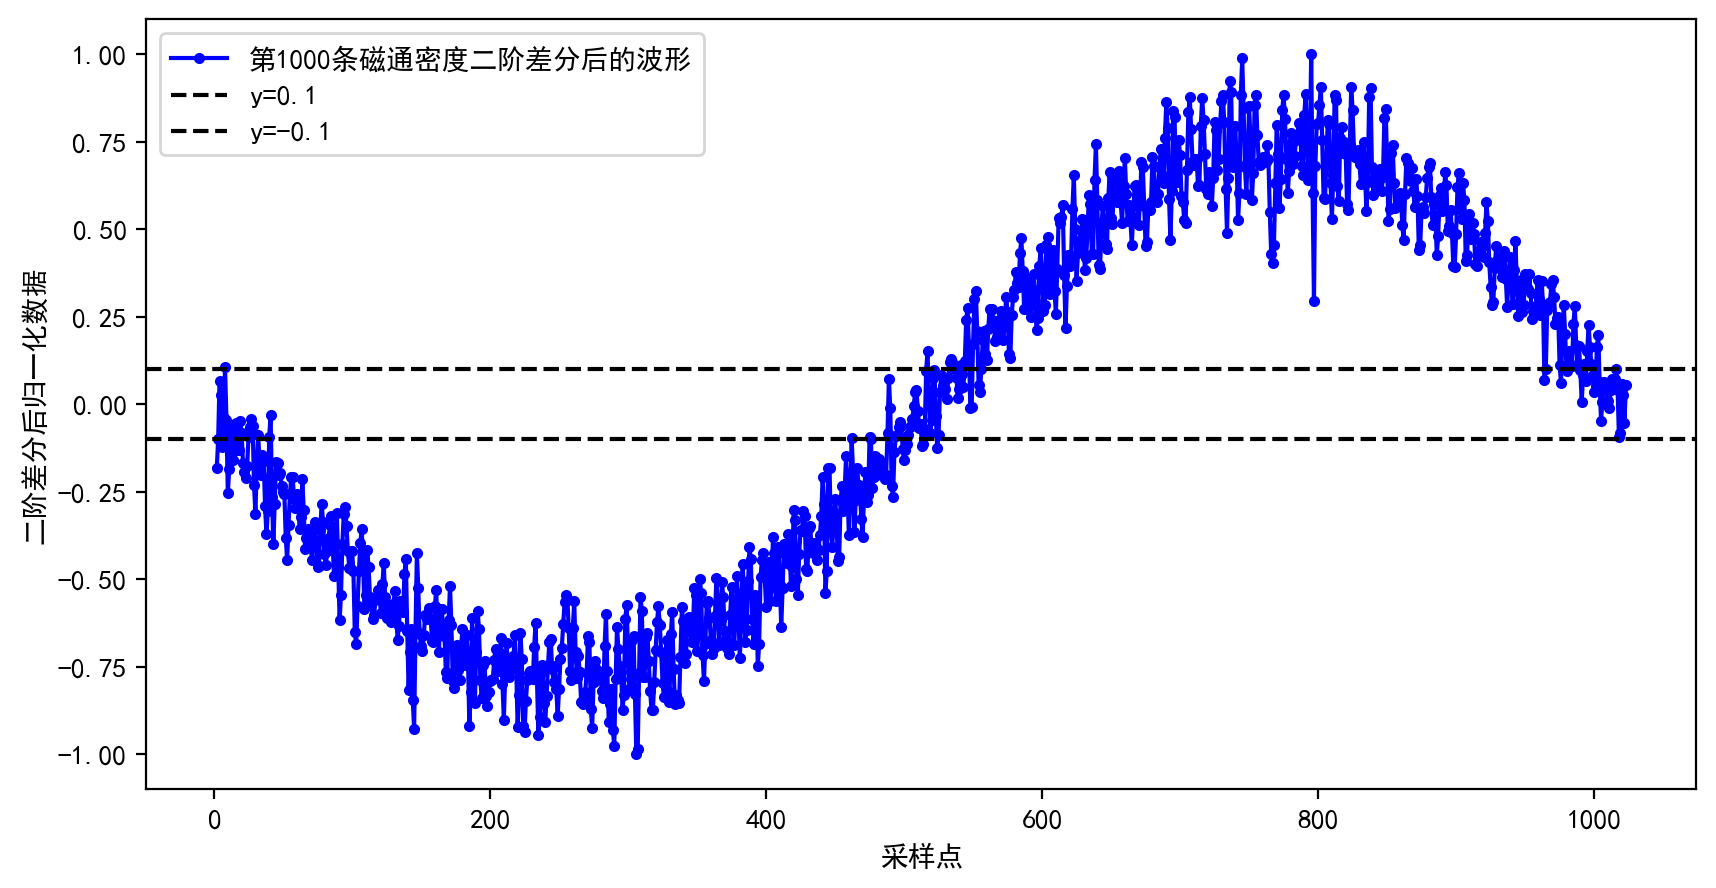

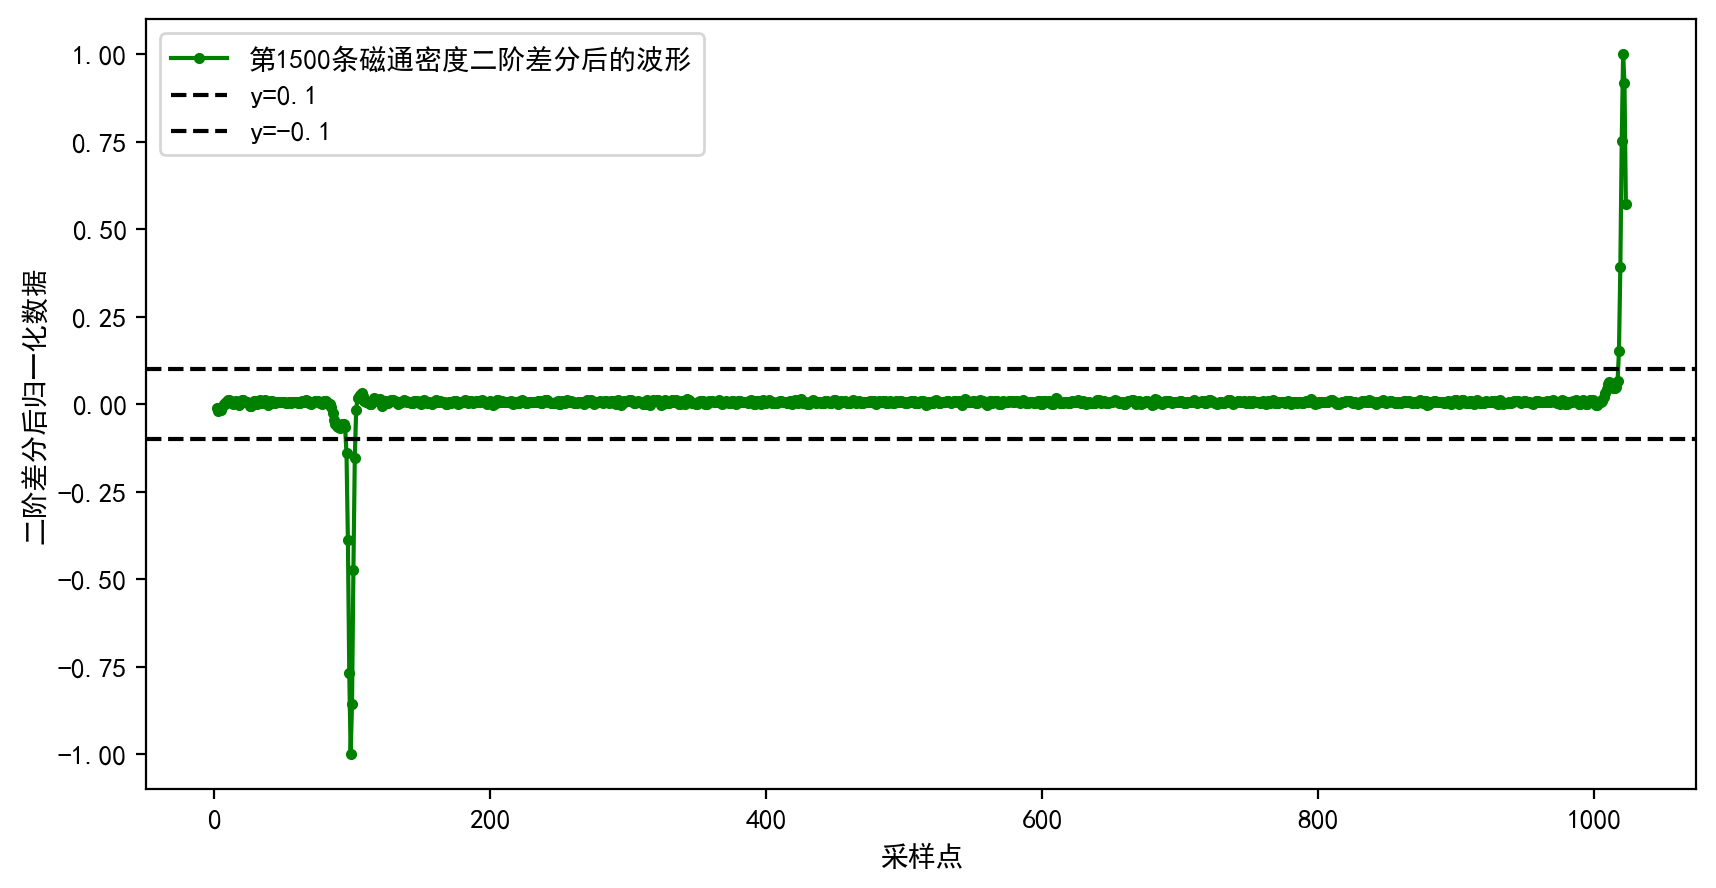

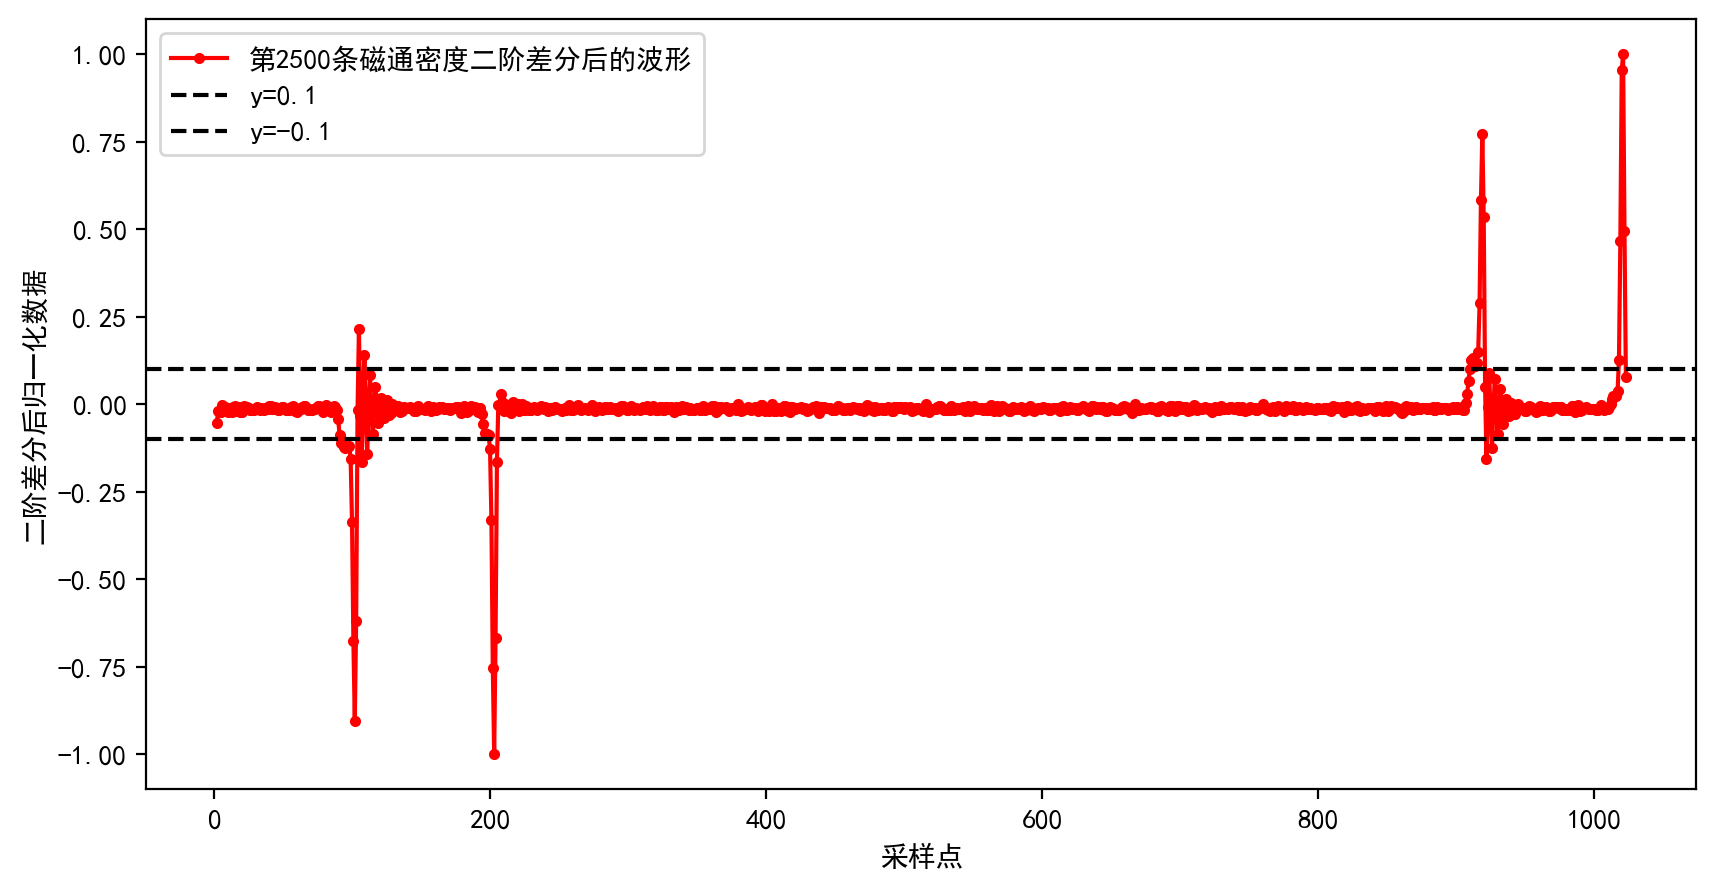

In [16]:
qushi=scaled_data.iloc[999,:]
plt.figure(figsize=(10, 5))
plt.plot(qushi, marker='o', linestyle='-', color='b', label='第1000条磁通密度二阶差分后的波形', markersize=3)
# 绘制 y=0.1 和 y=-0.1 的水平直线
plt.axhline(y=0.1, color='black', linestyle='--', label='y=0.1')
plt.axhline(y=-0.1, color='black', linestyle='--', label='y=-0.1')
plt.xlabel('采样点')
plt.ylabel('二阶差分后归一化数据')
plt.legend()
plt.savefig('正弦波磁通密度二阶差分后归一化数据波形图.png')
plt.show()

qushi=scaled_data.iloc[1499,:]
plt.figure(figsize=(10, 5))
plt.plot(qushi, marker='o', linestyle='-', color='g', label='第1500条磁通密度二阶差分后的波形', markersize=3)
plt.axhline(y=0.1, color='black', linestyle='--', label='y=0.1')
plt.axhline(y=-0.1, color='black', linestyle='--', label='y=-0.1')
plt.xlabel('采样点')
plt.ylabel('二阶差分后归一化数据')
plt.legend()
plt.savefig('三角波磁通密度二阶差分后归一化数据波形图.png')
plt.show()

qushi=scaled_data.iloc[2499,:]
plt.figure(figsize=(10, 5))
plt.plot(qushi, marker='o', linestyle='-', color='r', label='第2500条磁通密度二阶差分后的波形', markersize=3)
plt.axhline(y=0.1, color='black', linestyle='--', label='y=0.1')
plt.axhline(y=-0.1, color='black', linestyle='--', label='y=-0.1')
plt.xlabel('采样点')
plt.ylabel('二阶差分后归一化数据')
plt.legend()
plt.savefig('梯形波磁通密度二阶差分后归一化数据波形图.png')
plt.show()

In [17]:
# 统计每一行大于 0.1 的个数
count_greater_than_0_1 = (abs(scaled_data) > 0.1).sum(axis=1)
# 将大于 100 的值设置为 0
count_greater_than_0_1[count_greater_than_0_1 > 100] = 0

In [18]:
df['tuchu']=count_greater_than_0_1

In [19]:
# 对每一行中第 5 到最后一列的采样点求前向差分merged_data
forward_diff_12 = df2.iloc[:,:1024].diff(axis=1)  # 进行前向差分
forward_diff_22 = forward_diff_12.diff(axis=1)  # 进行二次前向差分

chafen2=forward_diff_22.iloc[:, 2:]

# 创建 MinMaxScaler 对象并指定范围 [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))

# 对每一行进行归一化
scaled_data = pd.DataFrame(scaler.fit_transform(chafen2.T).T, columns=chafen2.columns)

In [20]:
# 统计每一行大于 0.1 的个数
count_greater_than_0_1 = (abs(scaled_data) > 0.1).sum(axis=1)
# 将大于 100 的值设置为 0
count_greater_than_0_1[count_greater_than_0_1 > 100] = 0
df2['tuchu']=count_greater_than_0_1

In [21]:
# 分离X和Y
X = df.iloc[:,1025:]
Y = df['励磁波形']

In [31]:
X
X.to_excel('output2.xlsx', index=False, sheet_name='Sheet2')

In [29]:
X2=df2.iloc[:,1024:]
X2


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [25]:
Y_train = Y_train - 1
Y_test = Y_test - 1

逻辑回归 模型评价结果：
准确率 (Accuracy): 0.9620967741935483
召回率 (Recall): 0.961769991015274
F1分数 (F1-Score): 0.9615963232908925
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1176
           1       0.96      0.95      0.96      1484
           2       0.94      0.93      0.93      1060

    accuracy                           0.96      3720
   macro avg       0.96      0.96      0.96      3720
weighted avg       0.96      0.96      0.96      3720

逻辑回归 模型的 ROC AUC：0.9914445063954312
逻辑回归 模型交叉验证的平均准确率：0.9558755760368663
--------------------------------------------------


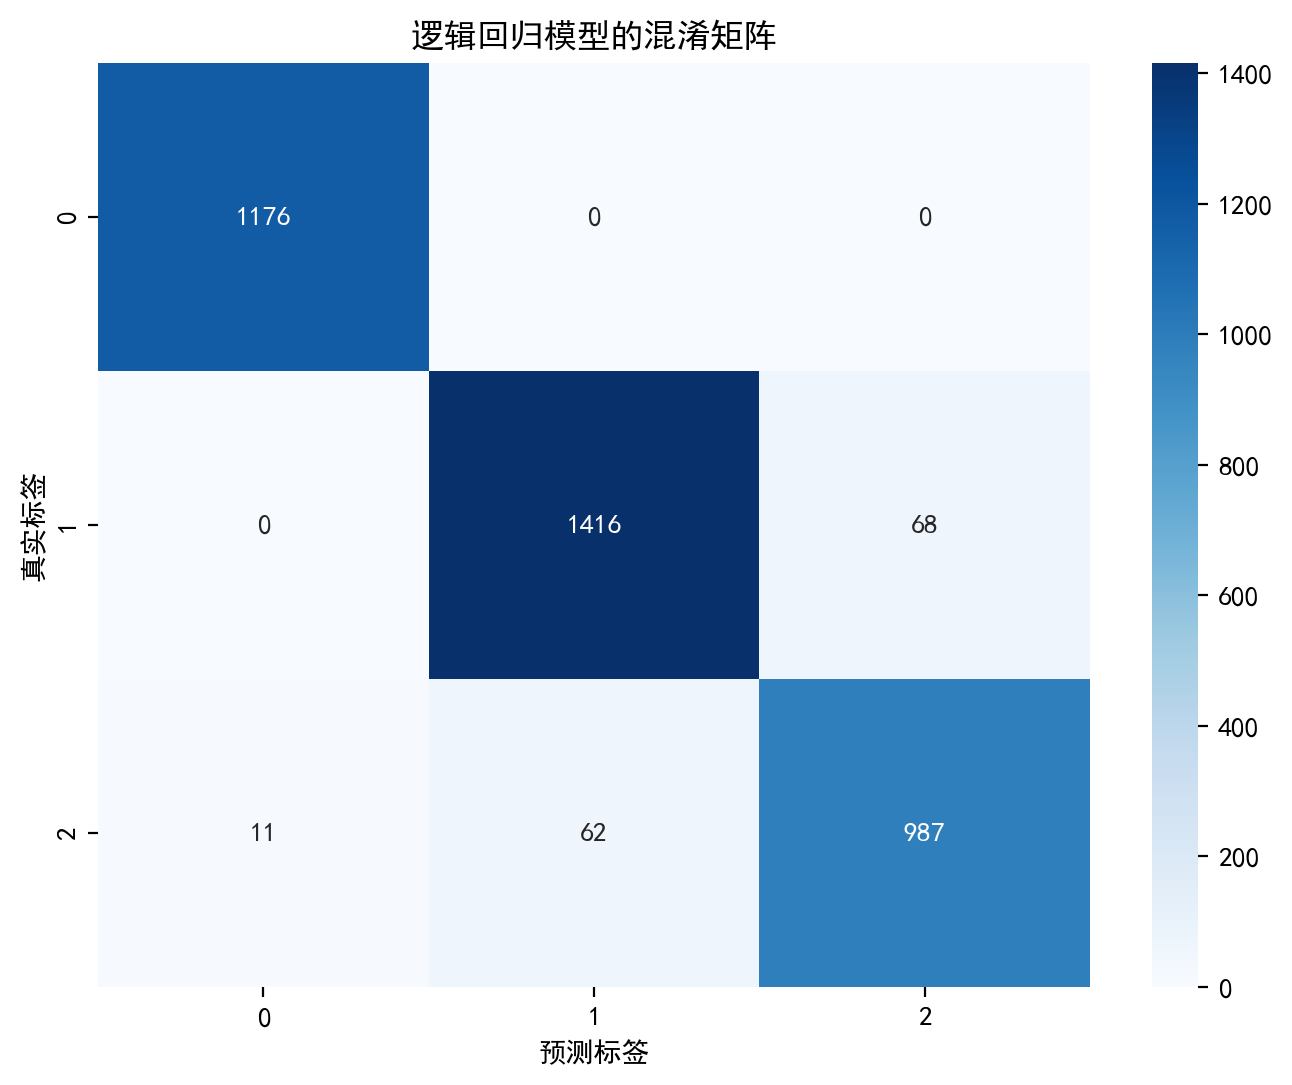

XGBoost 模型评价结果：
准确率 (Accuracy): 0.9994623655913979
召回率 (Recall): 0.999550763701707
F1分数 (F1-Score): 0.9994610613659171
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1176
           1       1.00      1.00      1.00      1484
           2       1.00      1.00      1.00      1060

    accuracy                           1.00      3720
   macro avg       1.00      1.00      1.00      3720
weighted avg       1.00      1.00      1.00      3720

XGBoost 模型的 ROC AUC：1.0
XGBoost 模型交叉验证的平均准确率：0.9998847926267281
--------------------------------------------------


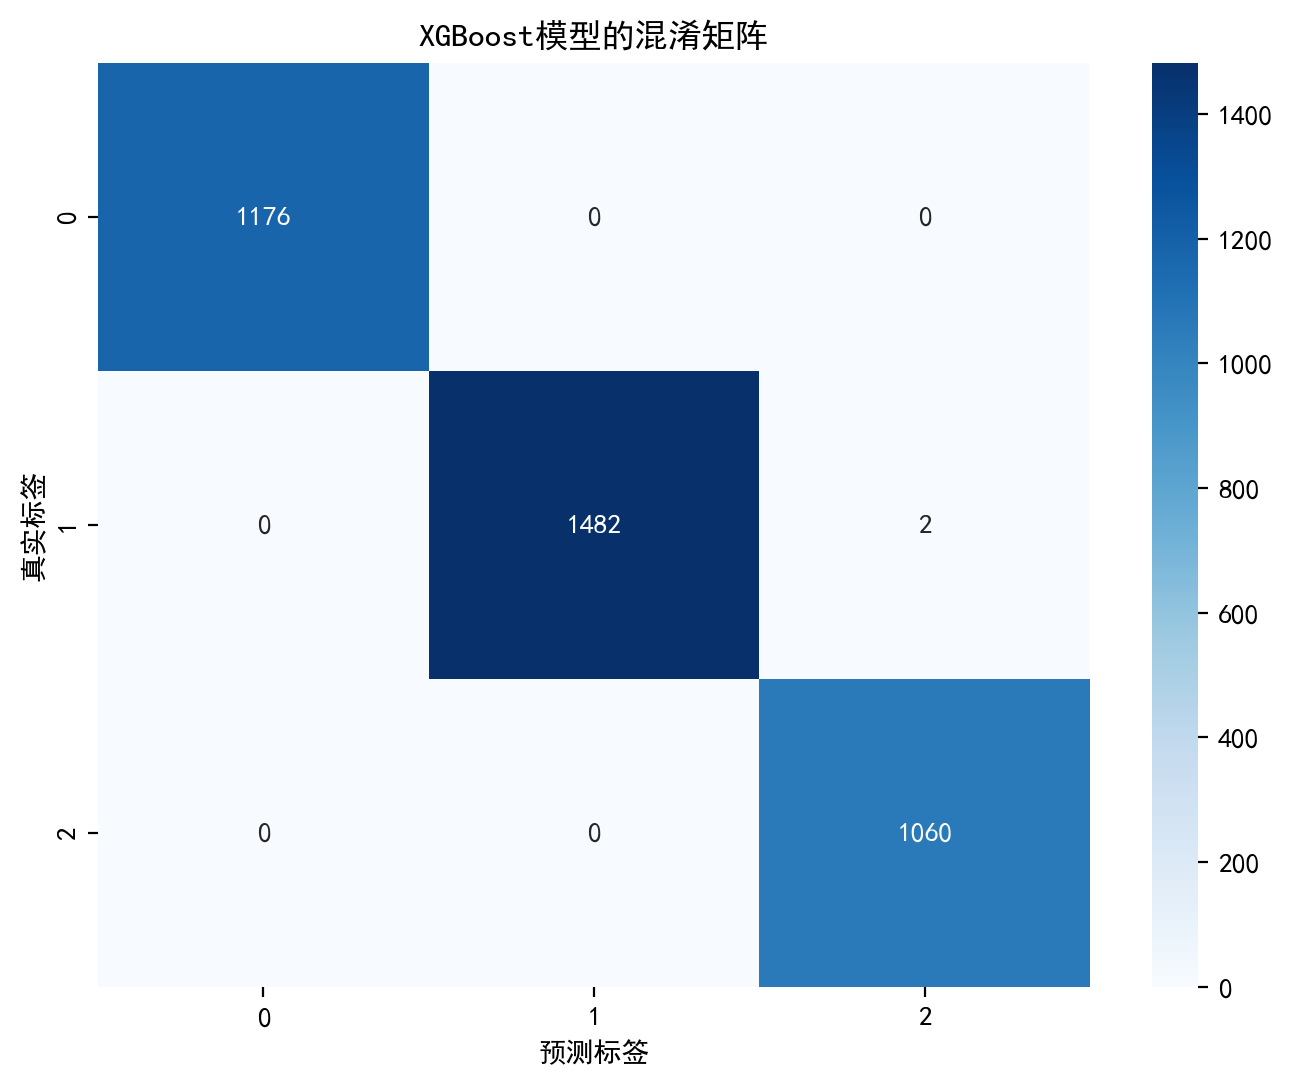

支持向量机 模型评价结果：
准确率 (Accuracy): 0.9913978494623656
召回率 (Recall): 0.990386343216532
F1分数 (F1-Score): 0.9913483457728495
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1176
           1       0.98      1.00      0.99      1484
           2       1.00      0.97      0.98      1060

    accuracy                           0.99      3720
   macro avg       0.99      0.99      0.99      3720
weighted avg       0.99      0.99      0.99      3720

支持向量机 模型交叉验证的平均准确率：0.9555299539170508
--------------------------------------------------


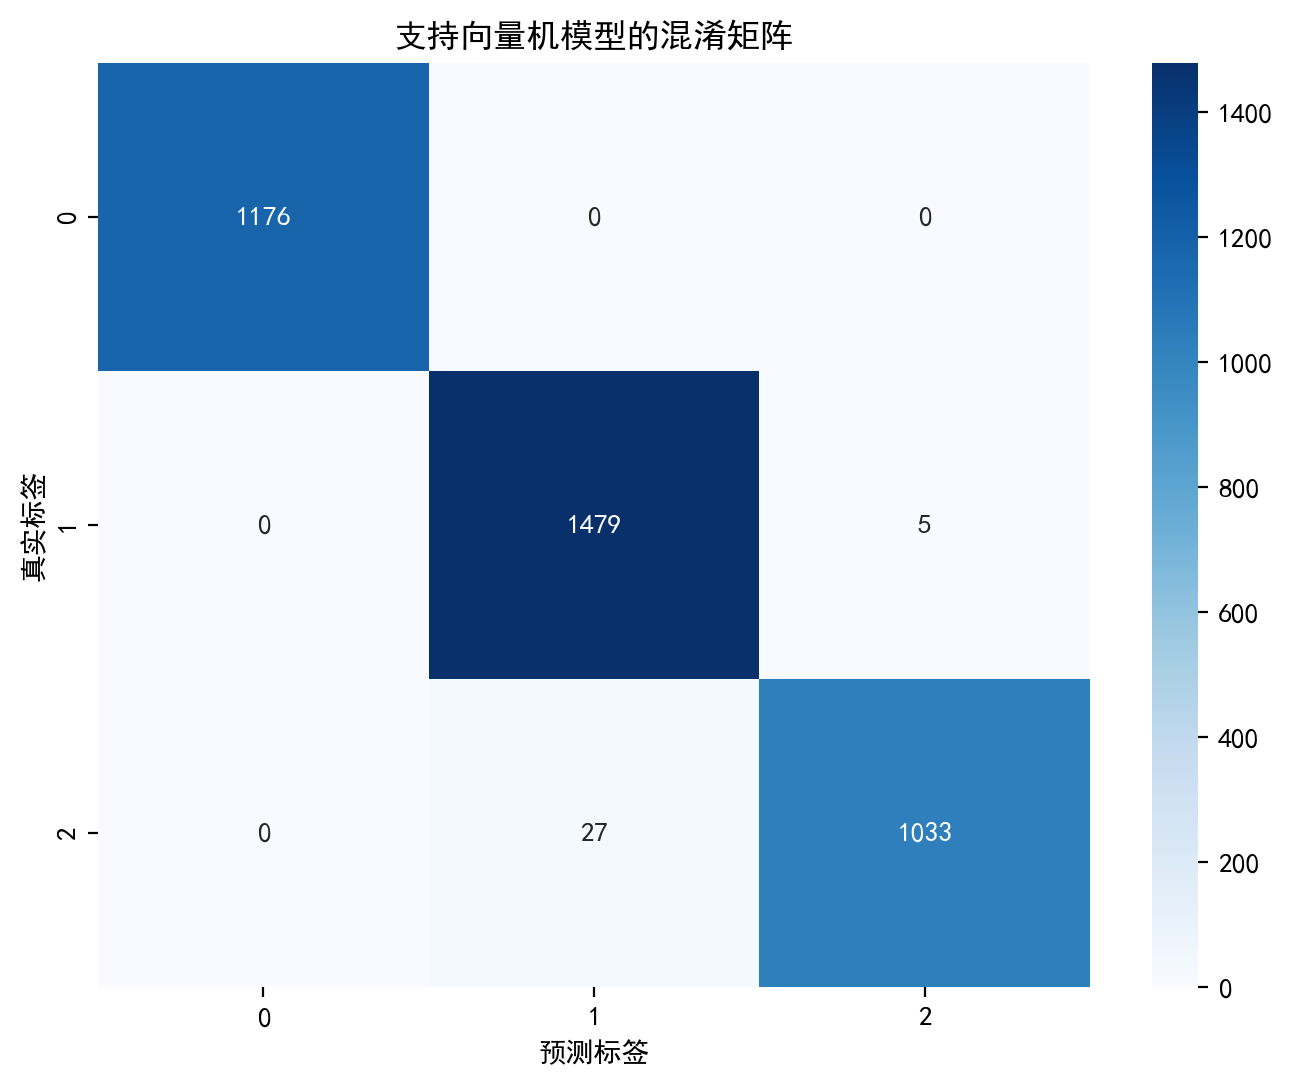

随机森林 模型评价结果：
准确率 (Accuracy): 1.0
召回率 (Recall): 1.0
F1分数 (F1-Score): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1176
           1       1.00      1.00      1.00      1484
           2       1.00      1.00      1.00      1060

    accuracy                           1.00      3720
   macro avg       1.00      1.00      1.00      3720
weighted avg       1.00      1.00      1.00      3720

随机森林 模型的 ROC AUC：1.0
随机森林 模型交叉验证的平均准确率：1.0
--------------------------------------------------


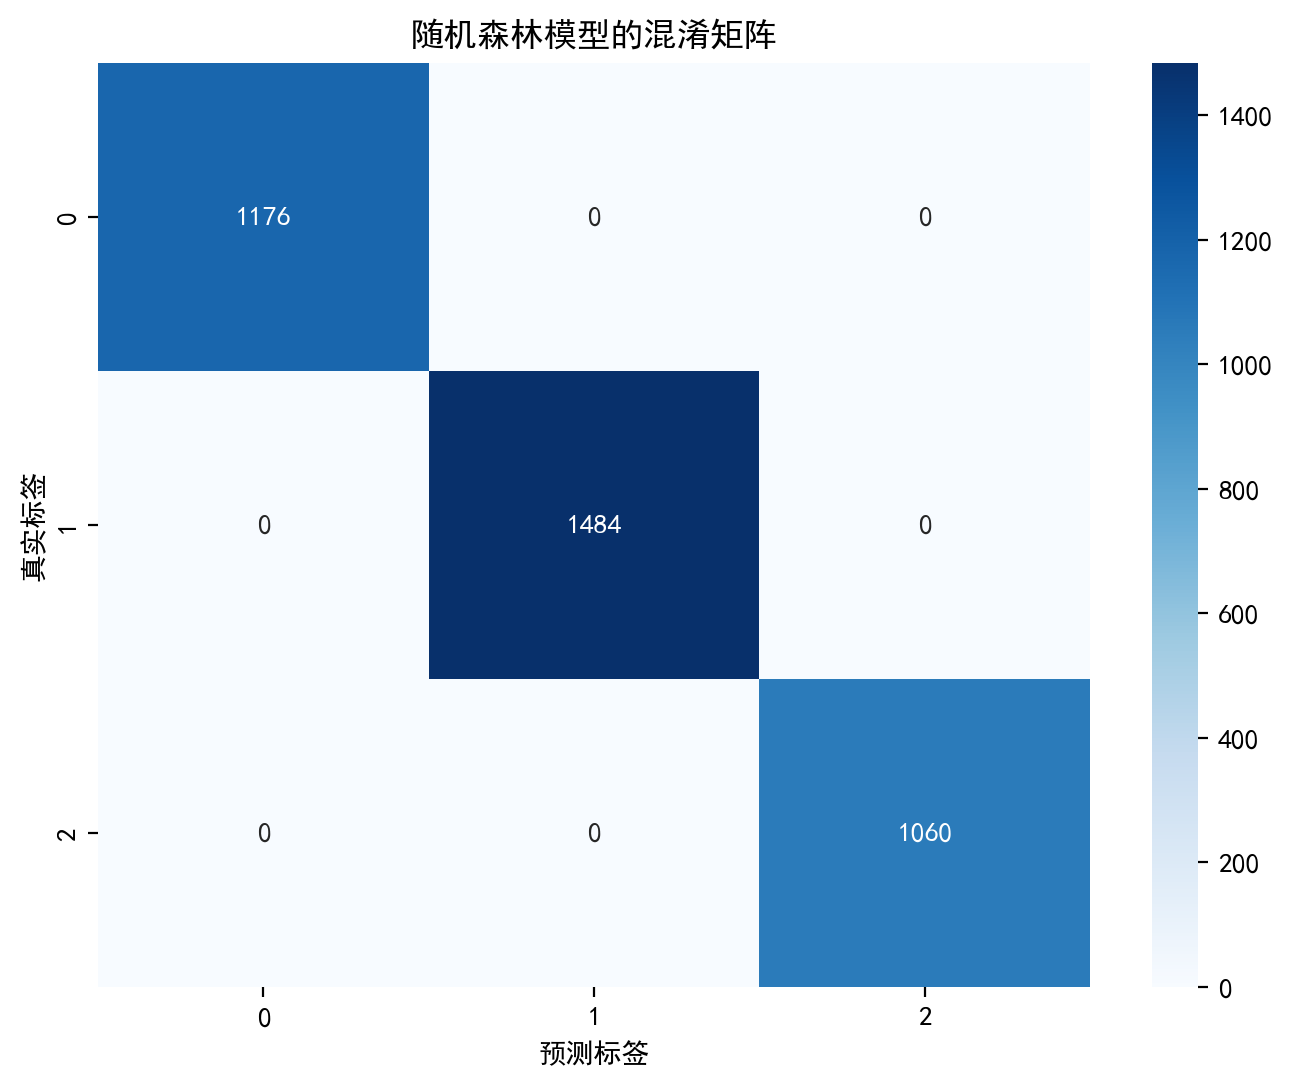

AdaBoost 模型评价结果：
准确率 (Accuracy): 1.0
召回率 (Recall): 1.0
F1分数 (F1-Score): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1176
           1       1.00      1.00      1.00      1484
           2       1.00      1.00      1.00      1060

    accuracy                           1.00      3720
   macro avg       1.00      1.00      1.00      3720
weighted avg       1.00      1.00      1.00      3720

AdaBoost 模型的 ROC AUC：1.0
AdaBoost 模型交叉验证的平均准确率：1.0
--------------------------------------------------


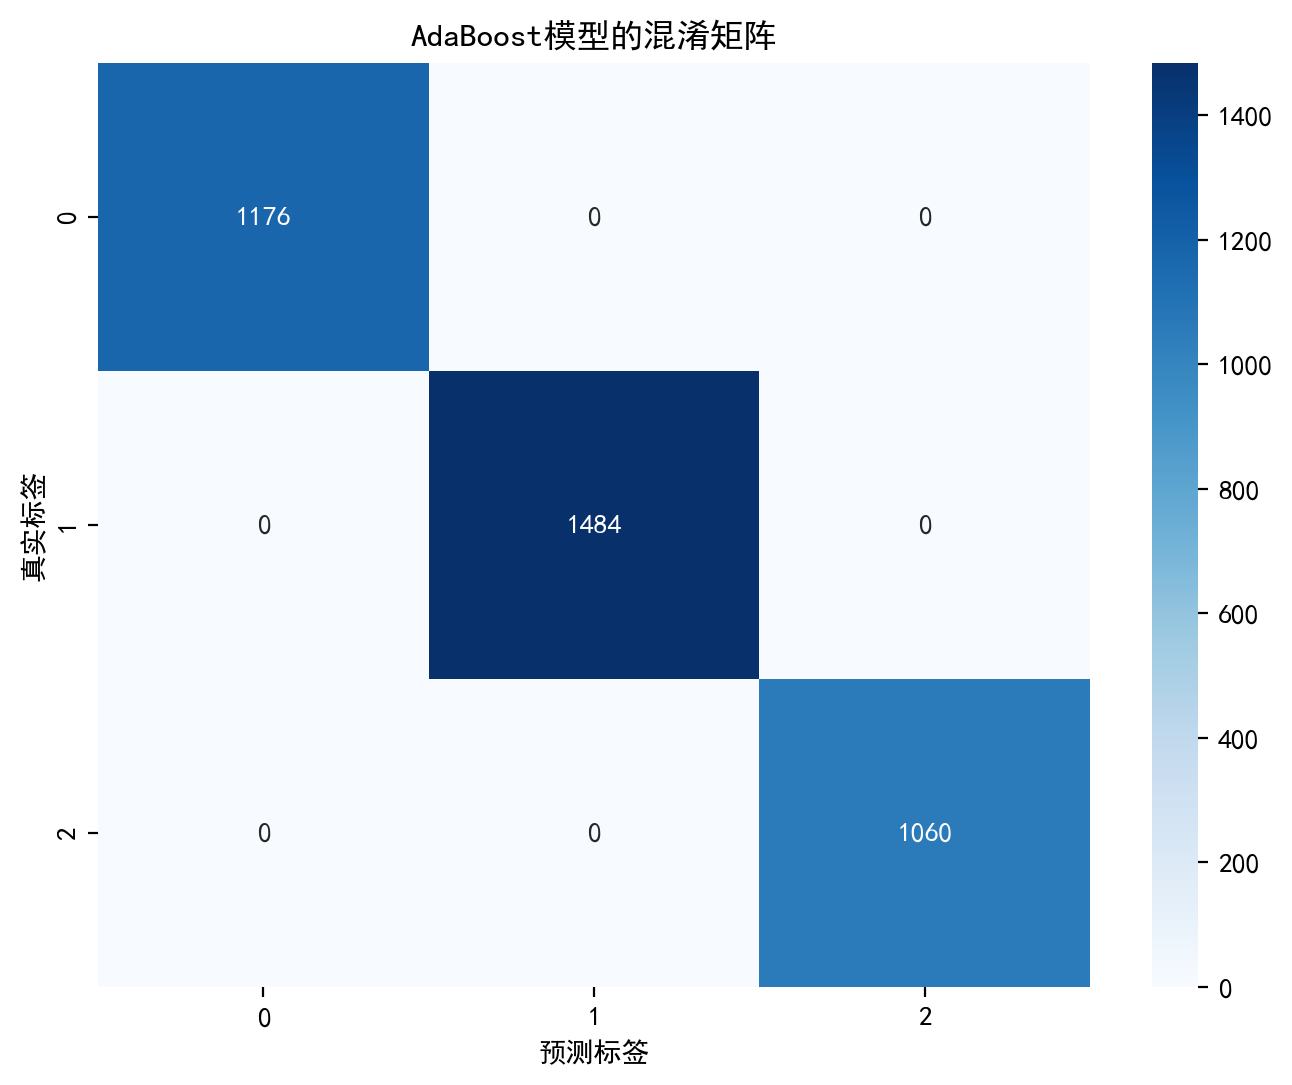

GBDT 模型评价结果：
准确率 (Accuracy): 1.0
召回率 (Recall): 1.0
F1分数 (F1-Score): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1176
           1       1.00      1.00      1.00      1484
           2       1.00      1.00      1.00      1060

    accuracy                           1.00      3720
   macro avg       1.00      1.00      1.00      3720
weighted avg       1.00      1.00      1.00      3720

GBDT 模型的 ROC AUC：1.0
GBDT 模型交叉验证的平均准确率：1.0
--------------------------------------------------


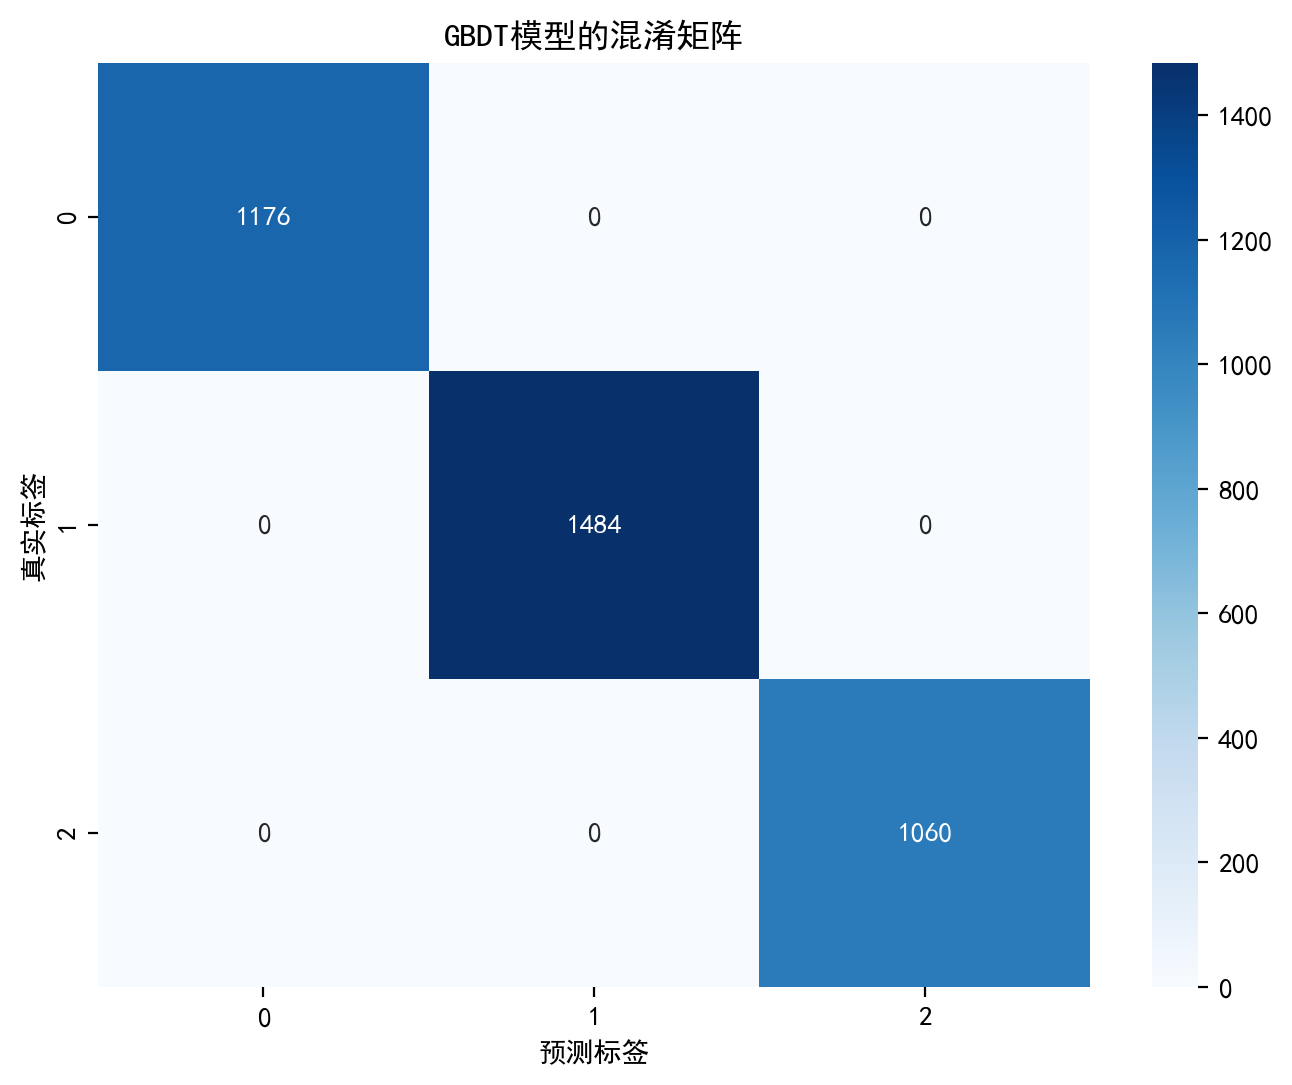

逻辑回归 的 ROC AUC 分数：0.9914445063954312
XGBoost 的 ROC AUC 分数：1.0
随机森林 的 ROC AUC 分数：1.0
AdaBoost 的 ROC AUC 分数：1.0
GBDT 的 ROC AUC 分数：1.0


In [26]:
# 定义模型
models = {
    '逻辑回归': LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced', random_state=41,C=0.3),
    'XGBoost': XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.3, objective='multi:softmax', num_class=3, random_state=41),
    '支持向量机':SVC(kernel='linear', random_state=41,C=0.1,max_iter=1000),
    '随机森林': RandomForestClassifier(n_estimators=100, max_depth=2, class_weight='balanced', random_state=41),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=41),
    'GBDT': GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.2, random_state=41)
}

# 全局ROC曲线数据
roc_data = []

# 处理每个模型
for name, model in models.items():
    # 拟合模型
    model.fit(X_train, Y_train)
    
    # 预测
    y_pred = model.predict(X_test)
    
    # 模型评估 - 准确率、召回率、F1值
    acc = accuracy_score(Y_test, y_pred)
    rec = recall_score(Y_test, y_pred, average='macro')  # 使用macro评估多分类
    f1 = f1_score(Y_test, y_pred, average='macro')       # 使用macro评估多分类
    classification = classification_report(Y_test, y_pred)

    print(f'{name} 模型评价结果：')
    print("准确率 (Accuracy):", acc)
    print("召回率 (Recall):", rec)
    print("F1分数 (F1-Score):", f1)
    print(classification)
    
    # 计算 ROC AUC（针对多分类任务，使用一对多策略）
    if hasattr(model, "predict_proba"):  # 检查模型是否有预测概率的函数
        y_prob = model.predict_proba(X_test)
        roc_auc = roc_auc_score(Y_test, y_prob, multi_class='ovr')  # 使用one-vs-rest
        roc_data.append((name, roc_auc))
        print(f'{name} 模型的 ROC AUC：{roc_auc}')
    
    # 交叉验证 (Cross-Validation)
    scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')
    print(f'{name} 模型交叉验证的平均准确率：{scores.mean()}')
    print('-'*50)
    
    # 绘制并保存混淆矩阵
    cm = confusion_matrix(Y_test, y_pred)
    plt.figure(figsize=(8, 6))
    
    # 使用 seaborn 绘制热力图，包含颜色条 cbar=True
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True, xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
    
    # 添加标题和标签
    plt.title(f'{name}模型的混淆矩阵')
    plt.xlabel('预测标签')
    plt.ylabel('真实标签')
    
    # 保存混淆矩阵图片
    plt.savefig(f'{name}_confusion_matrix.png')
    
    # 显示图像
    plt.show()

# 输出 ROC AUC 数据
for name, roc_auc in roc_data:
    print(f'{name} 的 ROC AUC 分数：{roc_auc}')

In [27]:
df2_features = X2
# 创建一个新的 DataFrame 用于存储预测结果
predictions_df = pd.DataFrame()
# 处理每个模型
for name, model in models.items():
    # 使用模型进行预测
    df2_predictions = model.predict(df2_features)
    df2_predictions = df2_predictions+1
    # 输出预测结果
    print(f'{name}模型的预测结果：')
    print(df2_predictions)
    # 将预测结果添加到 DataFrame 中
    predictions_df[name] = df2_predictions

逻辑回归模型的预测结果：
[2 2 2 2 2 3 3 3 3 3 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 3 3 3 3 3 3 2
 2 2 3 3 2 3 3 3 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2
 2 1 1 1 1 1]
XGBoost模型的预测结果：
[2 2 2 2 2 3 3 3 3 3 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 3 3 3 3 3 2 2
 2 2 2 3 2 3 3 3 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2
 2 1 1 1 1 1]
支持向量机模型的预测结果：
[2 2 2 2 2 3 3 3 3 3 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 3 3 3 3 3 2 2
 2 2 2 3 2 3 3 3 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2
 2 1 1 1 1 1]
随机森林模型的预测结果：
[2 2 2 2 2 3 3 3 3 3 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 3 3 3 3 3 2 2
 2 2 2 3 2 3 3 3 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2
 2 1 1 1 1 1]
AdaBoost模型的预测结果：
[2 2 2 2 2 3 3 3 3 3 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 3 3 3 3 3 2 2
 2 2 2 3 2 3 3 3 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2
 2 1 1 1 1 1]
GBDT模型的预测结果：
[2 2 2 2 2 3 3 3 3 3 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 3 3 3 3 3 2 2
 2 2 2 3 2 3 3 3 1 

In [28]:
# 将预测结果保存为 Excel 文件
predictions_df.to_excel('model_predictions.xlsx', index=False)

print("预测结果已保存为 'model_predictions.xlsx'")

PermissionError: [Errno 13] Permission denied: 'model_predictions.xlsx'